In [1]:
%cd ..\..

C:\Users\ricks\source\repos\Modern-Time-Series-Forecasting-with-Python


In [2]:
import pandas as pd

df = pd.read_csv("data\stock_prices\SPY US Equity#PX_LAST.csv", names=["date","price"], skiprows=1, index_col="date", parse_dates=True)
df.head()

,price
date,
2002-10-01,58.5547
2002-10-02,56.7992
2002-10-03,56.2254
2002-10-04,55.1939
2002-10-07,54.0531


<Axes: xlabel='date'>

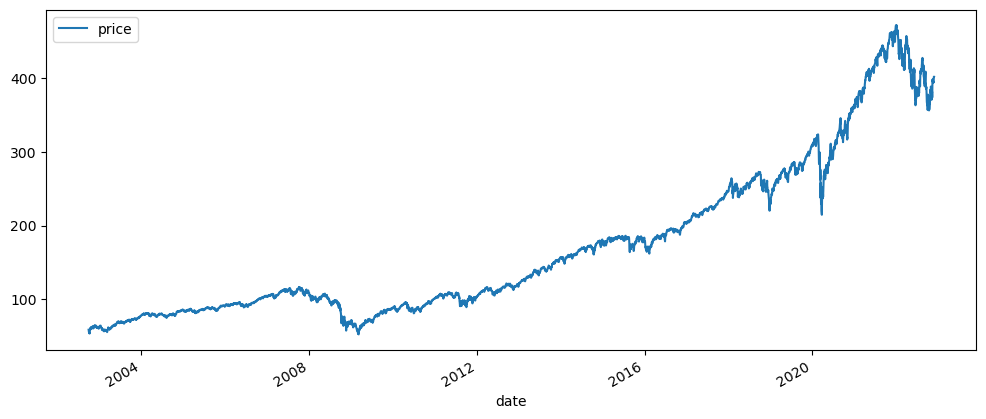

In [3]:
#df.plot(x="date", y="price", figsize=(12,5))
df.plot(figsize=(12,5))

In [5]:
df.resample("ME").mean()

,price
date,
2002-10-31,58.678878
2002-11-30,62.477725
2002-12-31,61.835924
2003-01-31,61.692729
2003-02-28,57.858205
...,...
2022-07-31,388.377725
2022-08-31,413.422630
2022-09-30,383.460119


<Axes: xlabel='date'>

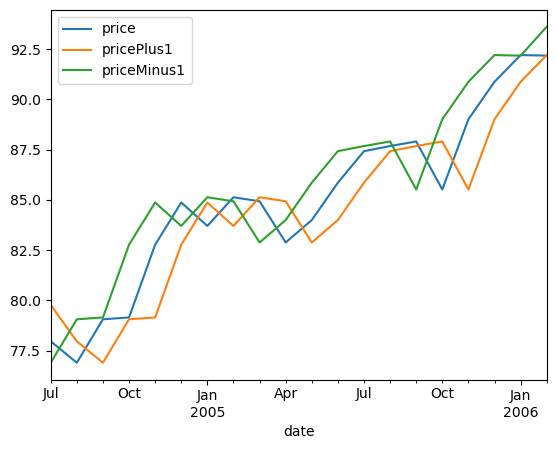

In [7]:
src = pd.DataFrame(df.resample("ME").mean())
src["pricePlus1"] = src["price"].shift(1)
src["priceMinus1"] = src["price"].shift(-1)
src = src.dropna().iloc[20:40]
src.plot()

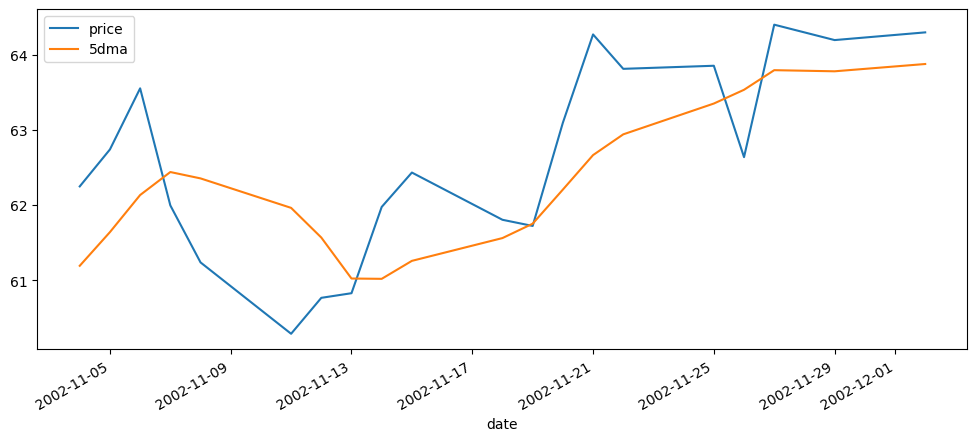

In [18]:
plot_df = pd.DataFrame(df)
plot_df["5dma"] = df["price"].rolling(window=5).mean()

plot_df = plot_df.dropna()
plot_df = plot_df[20:40]

plot_df.plot(figsize)

#del plot_df

   price   expand1   expand3
0      3  3.000000       NaN
1     -2  0.500000       NaN
2      1  0.666667  0.666667
3      6  2.000000  2.000000
4      7  3.000000  3.000000
5      4  3.166667  3.166667
6      3  3.142857  3.142857
7     10  4.000000  4.000000
8      6  4.222222  4.222222
9      9  4.700000  4.700000


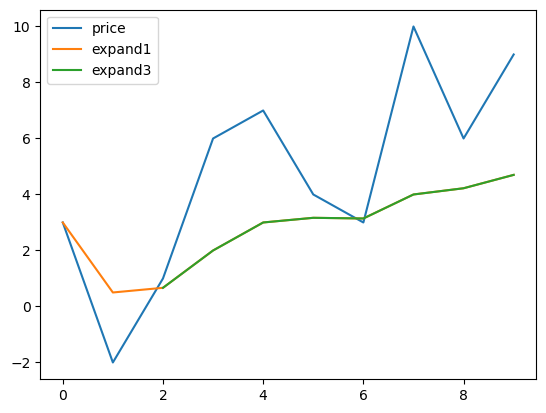

In [44]:
# import random
# series = []
# for n in range(0,10):
#         series.append(n + random.randint(-3,3))
# #[3, -2, 1, 6, 7, 4, 3, 10, 6, 9]

df_expand = pd.DataFrame([3, -2, 1, 6, 7, 4, 3, 10, 6, 9], columns=["price"])
df_expand["expand1"] = df_expand["price"].expanding(1).mean()
df_expand["expand3"] = df_expand["price"].expanding(3).mean()
print(df_expand)
df_expand.plot()
del df_expand